In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#import raw dataset

df = pd.read_excel("Volve production data.xlsx", "Daily Production Data", index_col="DATEPRD")
df.head()

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,96.87589,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [5]:
#drop columns, assign new dataframe
drop_cols = ["WELL_BORE_CODE", 'NPD_FIELD_CODE', 'NPD_FIELD_NAME', "NPD_WELL_BORE_NAME", 'NPD_FACILITY_CODE',
             "BORE_WI_VOL", "FLOW_KIND", "WELL_TYPE", 'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM', "ON_STREAM_HRS"]

df_new = df.drop(columns = drop_cols)

#drop injection wells
df_new = df_new[ (df_new['NPD_WELL_BORE_CODE'] != 5693) & (df_new['NPD_WELL_BORE_CODE'] != 5769) ]

#Data is highly skewed, hence pad the missing values
for col in df_new.columns:
    df_new[col] = df_new[col].fillna(method='pad')

In [6]:
df_new.loc["2013-09-20"]

,NPD_WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,,,
2013-09-20,7078,269.077562,105.316865,180.092369,1.125138,6.765331,88.985192,48.904206,61.566096,642.66,96484.07,51.78
2013-09-20,5599,0.000000,0.000000,31.374663,13.156725,54.952593,31.374663,88.798289,2.945947,184.80,27743.81,2546.07
2013-09-20,5351,256.749383,100.338014,220.070831,18.686216,39.669585,36.678551,82.348068,7.610854,326.59,47449.05,2440.95


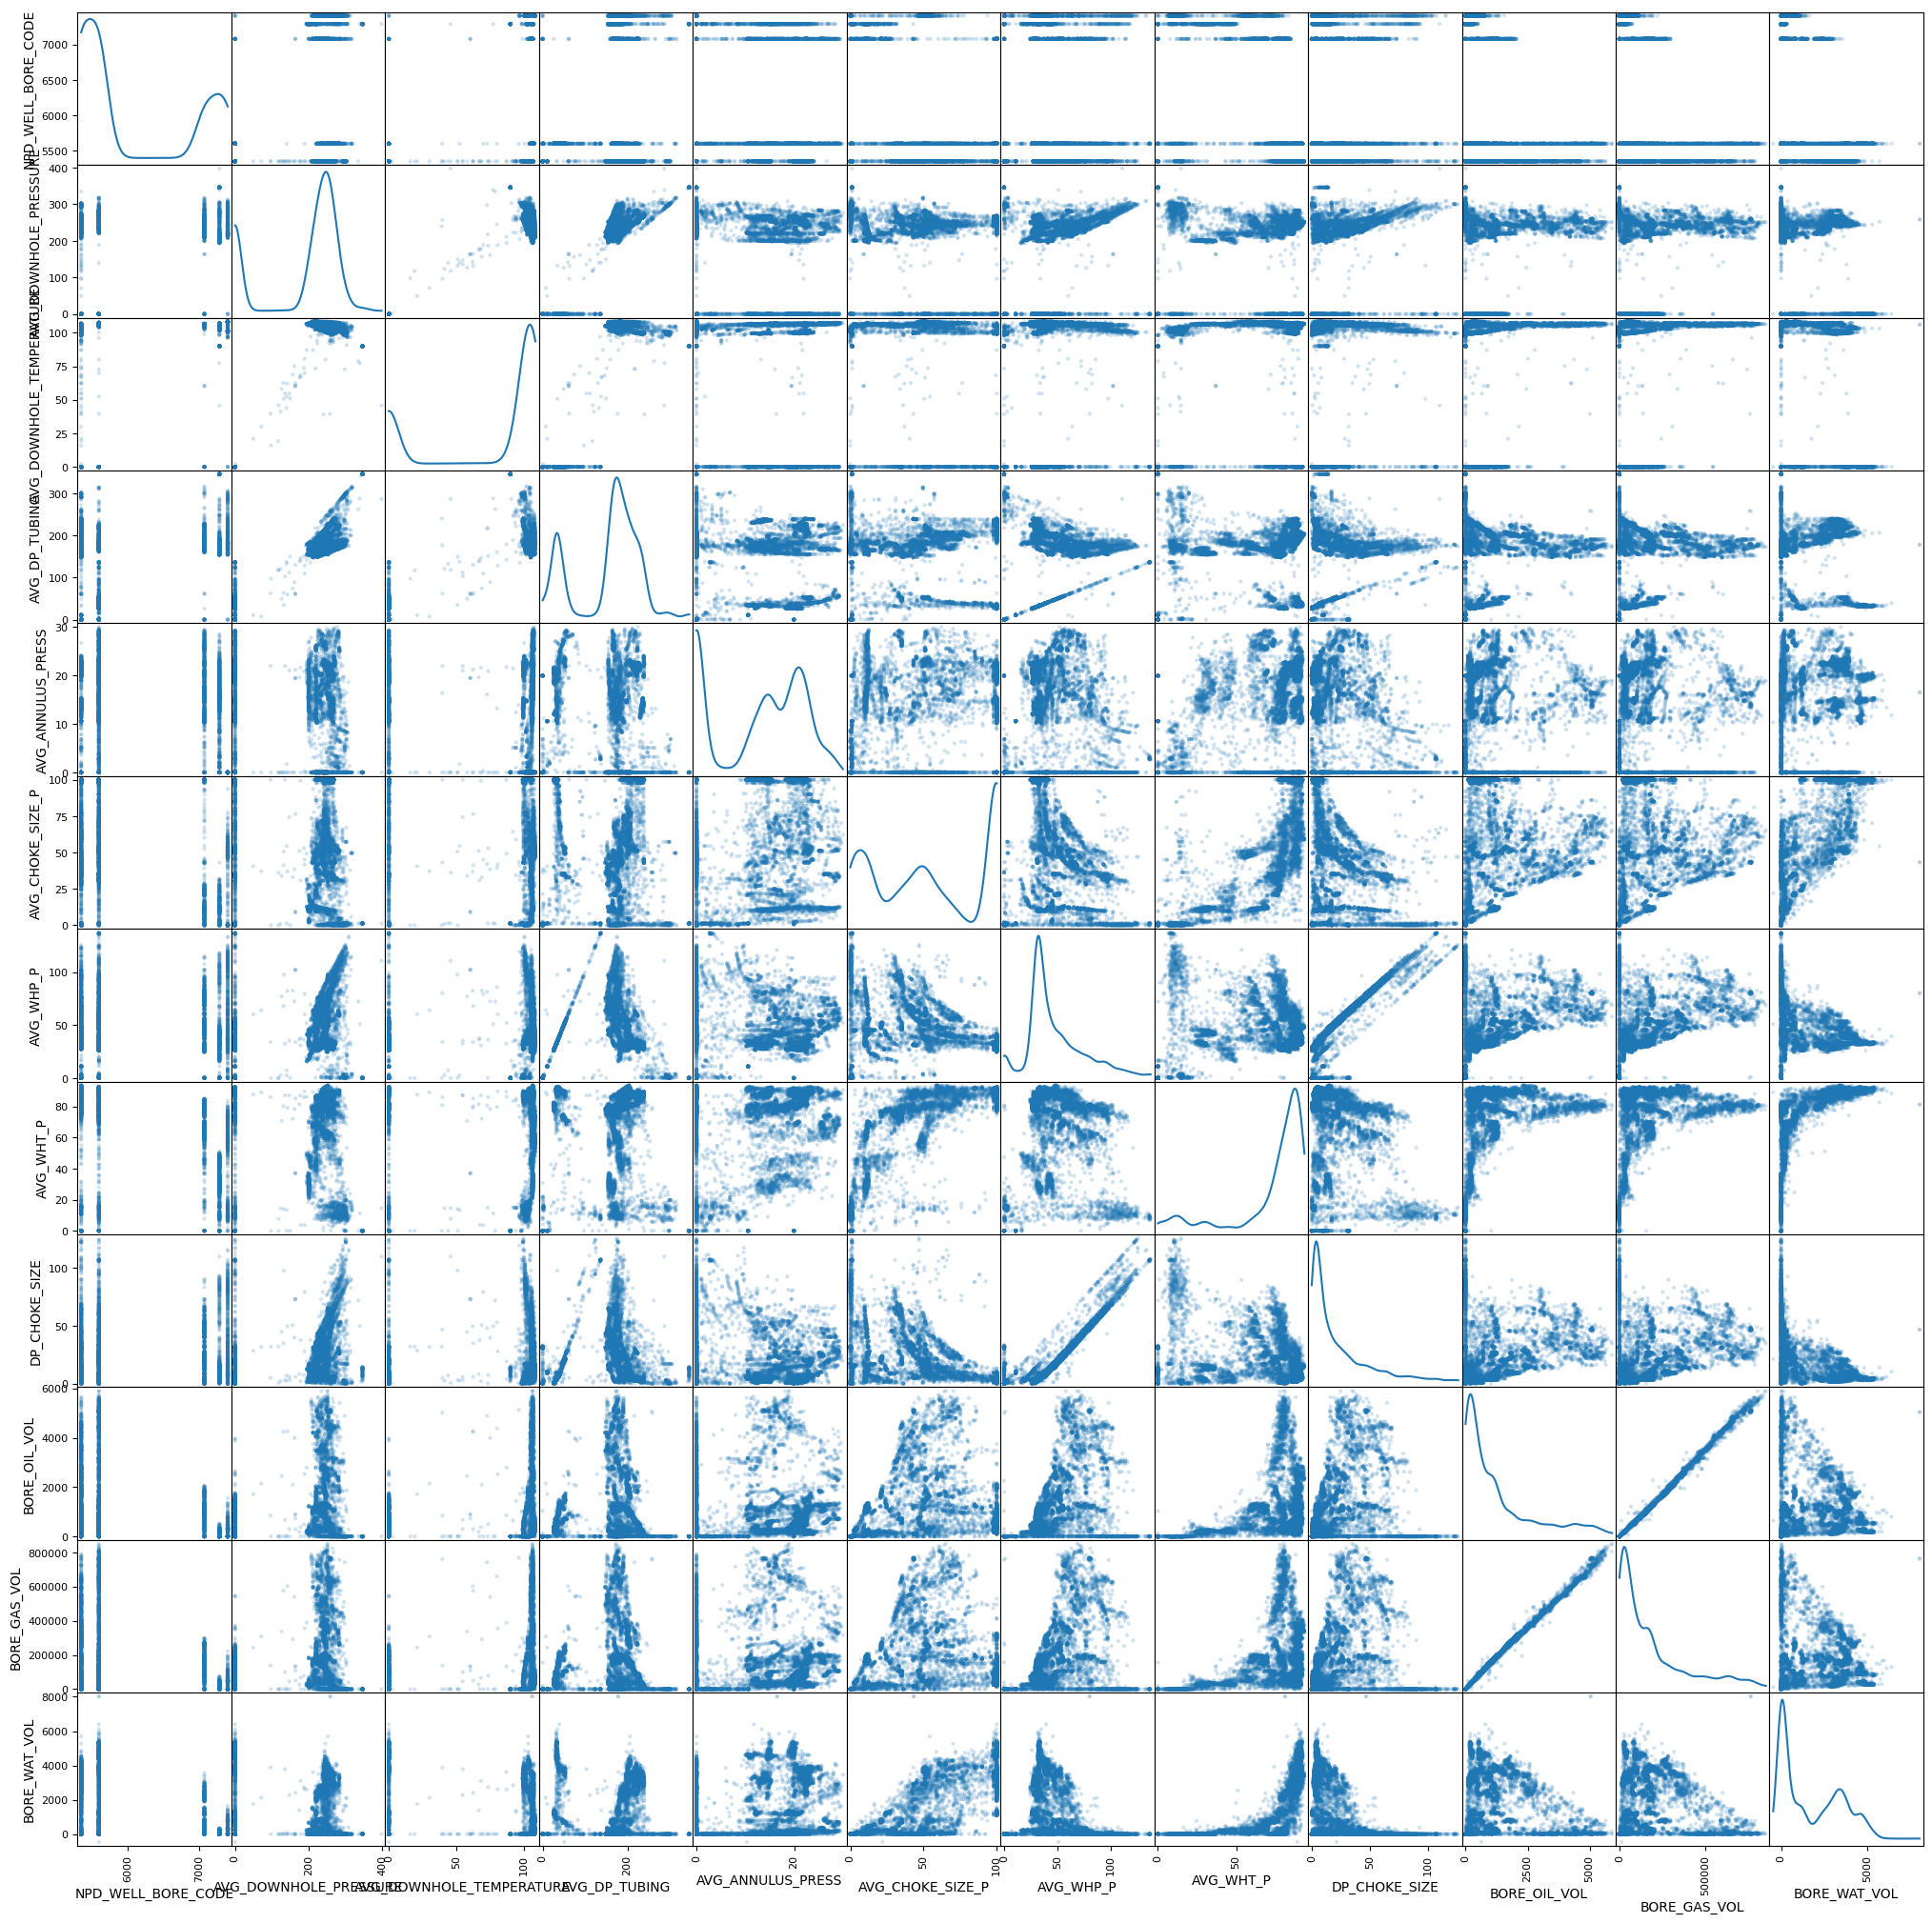

In [7]:
pd.plotting.scatter_matrix(df_new, alpha=0.2, figsize=(25, 25), diagonal="kde")
plt.show()

In [14]:
#create dataframe dictionary where each key corresponds to each well
df_dict = {well_code:df_new[df_new.NPD_WELL_BORE_CODE == well_code]
           for well_code in df_new['NPD_WELL_BORE_CODE'].unique()}

#drop well codes inplace and write each well df to excel file
i = 1
for well_code in df_dict:
    well_df = df_dict[well_code].drop(columns = ["NPD_WELL_BORE_CODE"])
    
    try:
        with pd.ExcelWriter("field_data.xlsx", mode='a', if_sheet_exists='replace') as writer:
            well_df.to_excel(writer, sheet_name=f'well{i}')
    
    except FileNotFoundError:
        well_df.to_excel("field_data.xlsx", sheet_name=f'well{i}')
        
    i+=1

df_dict.keys()

dict_keys([7405, 7078, 5599, 5351, 7289])

In [ ]:
#function to get well data given the well code
def get_df(well_code):
    return df_dict[well_code]
